In [7]:
import os
import numpy as np
from numpy import reshape
import torch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from pathlib import Path
home = str(Path.home())
base_path = os.path.join(home, 'workspace/multiLID/data/extract/run_1/')

In [2]:
# chars     = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/std/8_255/LID/k_10/characteristics')[:NR_SAMPLES]
# chars_adv = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/std/8_255/LID/k_10/characteristics_adv')
NR_SAMPLES = 2000

y = []
characteristics_adv = {}
characteristics_clean = {}

for it, att in enumerate(attacks):
    clean     = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/k_10/characteristics'.format(att) )[:NR_SAMPLES]
    chars_adv = torch.load('./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/k_10/characteristics_adv'.format(att) )[:NR_SAMPLES]
    characteristics_clean[att] = clean
    characteristics_adv[att]   = chars_adv
    
    # y.append( np.zeros((chars_adv.shape[0])) +  np.ones((chars_adv.shape[0])) *it )

NameError: name 'attacks' is not defined

In [ ]:
for att in attacks:
    print(characteristics_adv[att].shape)

In [ ]:
layers = [ x  for x in range(12)]
attacks = ['gauss', 'fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']
labels = ['gauss', 'fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']
cdict  = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}

In [ ]:
layers = [ x  for x in range(12)]
attacks = ['fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']
labels  = ['fgsm', 'bim', 'pgd', 'aa',        'df', 'cw']
cdict        = {0: 'black', 1: 'blue', 2: 'red', 3: 'green', 4: 'cyan', 5: 'orange', 6: 'purple'}

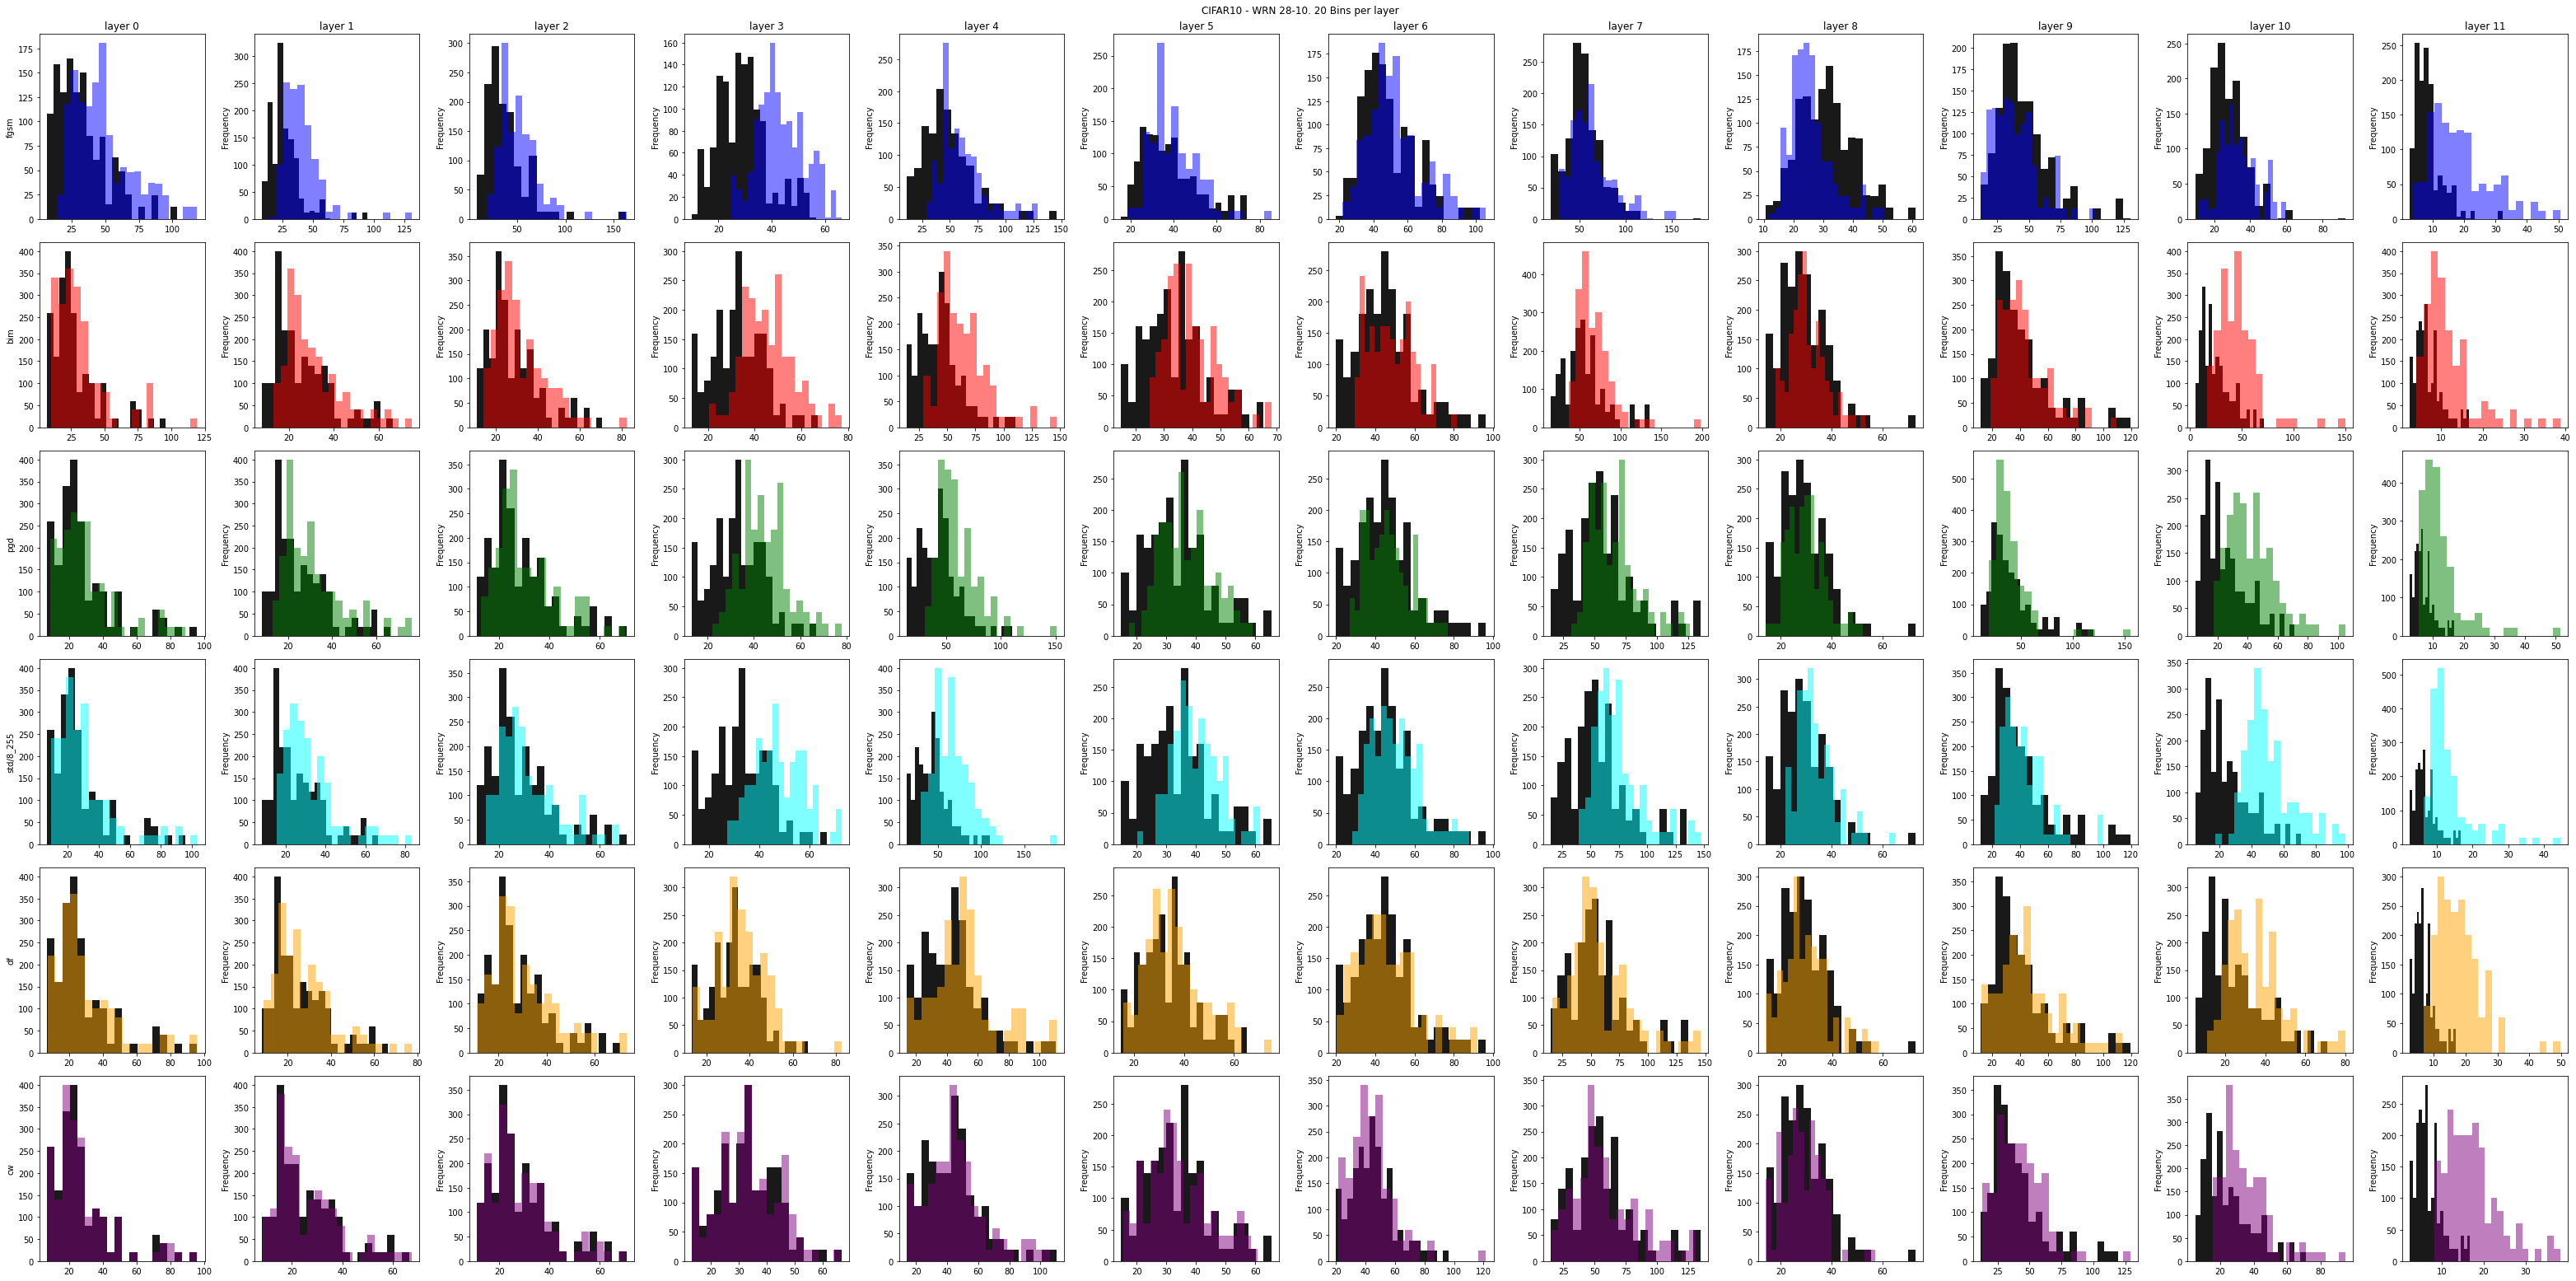

In [20]:
fig, axs = plt.subplots(len(attacks), len(layers), figsize=(44, 22))
BINS = 20

fig.suptitle( "CIFAR10 - WRN 28-10. {} Bins per layer ".format(BINS) )

for i, att in enumerate(attacks):
    
    for layer in layers:
        df = pd.DataFrame.from_dict(characteristics_clean[att])
        df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
        df[int(layer)].plot.hist( ax=axs[    i, layer], bins=BINS, color='black',   alpha = 0.9)
        df_adv[int(layer)].plot.hist( ax=axs[i, layer], bins=BINS, color=cdict[i+1], alpha = 0.5 )
        if layer == 0:
            axs[i, 0].set_ylabel(att)
        if i == 0:
            axs[i,layer].set_title("layer {}".format(layer))
            
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [ ]:
fig.savefig( 'plots/' + str(NR_SAMPLES) + '/' + 'cifar10_hist.svg')

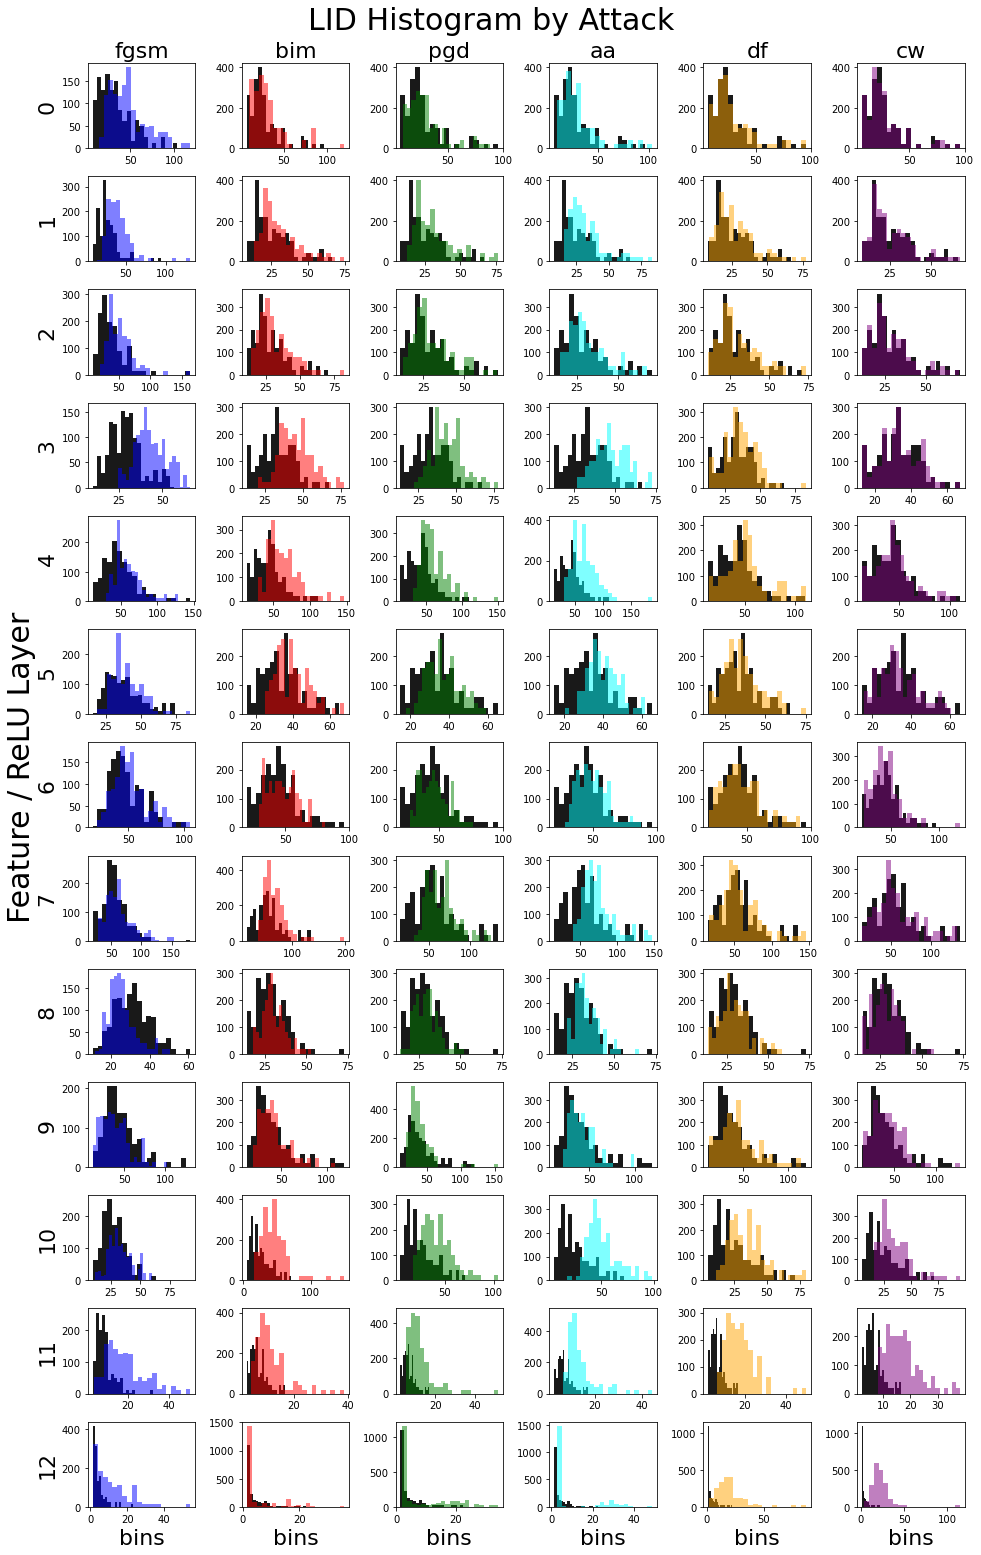

In [25]:
fig, axs = plt.subplots( 13, len(attacks), figsize=(14, 22))
BINS = 20

fig.suptitle( "LID Histogram by Attack".format(BINS), fontsize=30 )
fig.supylabel('Feature / ReLU Layer', fontsize=30)

for i, att in enumerate(attacks):
    
    for layer in [ x  for x in range(13)]:
        df = pd.DataFrame.from_dict(characteristics_clean[att])
        df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
        df[int(layer)].plot.hist(     ax=axs[layer, i], bins=BINS, color='black',   alpha = 0.9)
        df_adv[int(layer)].plot.hist( ax=axs[layer, i], bins=BINS, color=cdict[i+1], alpha = 0.5 )
        if i  == 0:
            axs[layer, i].set_ylabel("{}".format(layer),  fontsize=22 )
        else:
            axs[layer, i].set_ylabel("")
        if layer  == 12:
            axs[layer, i].set_xlabel("bins",  fontsize=22 )
        if layer == 0:
            axs[layer, i].set_title(labels[i],  fontsize=22 )
            
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [26]:
fig.savefig( 'plots/' + 'bins/'  + 'cifar10_hist_vert_k10_new.svg')

In [9]:
attacks = ['fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']
labels  = ['FGSM', 'BIM', 'PGD', 'AA', 'DF', 'CW']
#cdict  = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}
cdict  = {0: 'blue', 1: 'red', 2: 'green', 3: 'cyan', 4: 'orange', 5: 'purple'}

In [13]:
characteristics_clean = {}
characteristics_adv = {}
for att in attacks:
    clean     = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/{}/lid/k20/normalos.pt'.format(att)) )[:NR_SAMPLES]
    chars_adv = torch.load(os.path.join(base_path, 'cifar10/wrn28-10/{}/lid/k20/adverlos.pt'.format(att)) )[:NR_SAMPLES]
    characteristics_clean[att] = clean
    characteristics_adv[att]   = chars_adv

FileNotFoundError: [Errno 2] No such file or directory: '/home/lorenzp/workspace/multiLID/data/extract/run_1/cifar10/wrn28-10/fgsm/lid/k20/normalos.pt'

KeyError: 'fgsm'

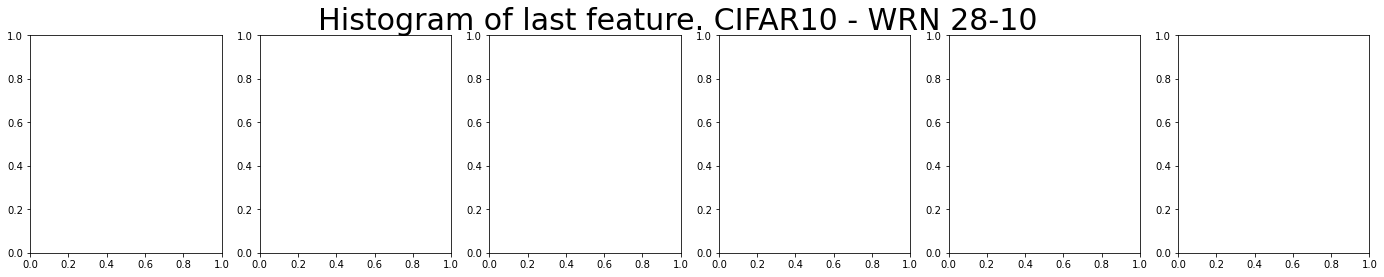

In [8]:
Layer_nr = 12

fig, axs = plt.subplots(  1 , len(attacks), figsize=(24, 4) )
BINS = 20

fig.suptitle( "Histogram of last feature. CIFAR10 - WRN 28-10", fontsize=30 )
# fig.supylabel('Frequency per Feature')

for i, att in enumerate(attacks):
    df = pd.DataFrame.from_dict(characteristics_clean[att])
    df_adv = pd.DataFrame.from_dict(characteristics_adv[att])
    df[int(Layer_nr)].plot.hist(ax=axs[i], bins=BINS, color='black',    alpha = 0.9)
    df_adv[int(Layer_nr)].plot.hist( ax=axs[i], bins=BINS, color=cdict[i], alpha = 0.5)
    if i  == 0:
        axs[i].set_ylabel( "frequency", fontsize=25 )
    if i  > 0:
        axs[i].set_ylabel("")

    axs[i].set_title(labels[i], fontsize=25)
    axs[i].set_xlabel("bins", fontsize=25)
        
fig.tight_layout(rect=[0, 0, 0.99, 0.99])

In [36]:
fig.savefig( 'plots/' + 'bins/' + 'cifar10_hist_vert_1row_k20_new.png', bbox_inches='tight', dpi=600)